# Advanced AI: Tranformers for Computer Vision

## Classification of 5 different flowers
Roses, sunflower, tulips, daisy and dandelion

In [ ]:
!wget https://github.com/jonfernandes/flowers-dataset/raw/main/flower_photos.tgz
!tar -xvf flower_photos.tgz


--2023-09-21 20:31:47--  https://github.com/jonfernandes/flowers-dataset/raw/main/flower_photos.tgz
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/jonfernandes/flowers-dataset/main/flower_photos.tgz [following]
--2023-09-21 20:31:47--  https://media.githubusercontent.com/media/jonfernandes/flowers-dataset/main/flower_photos.tgz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/octet-stream]
Saving to: ‘flower_photos.tgz.1’

flower_photos.tgz.1 100%[===================>] 218.21M   202MB/s    in 1.1s    

2023-09-21 20:31:48 (202 MB/s) - ‘flower_photos.

In [ ]:
!ls flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


### Installing all the python packages required
1) Transformers: use pre-trained transformer models

2) Datasets: Manipulate datasets

3) Evaluate: Evaluate models (accuracy)

4) Gradio: Web demo for classification solution



In [ ]:
!apt-get update
!apt-get upgrade


Hit:1 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,283 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,260 kB]
Fetched 2,885 kB in 2s (1,233 kB/s)
Reading package li

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install transformers==4.24.0 datasets==2.7.1 evaluate==0.3.0 gradio==0.4.0  huggingface_hub==0.11.1


In [ ]:
from datasets import load_dataset

ds = load_dataset('imagefolder', data_files='https://github.com/jonfernandes/flowers-dataset/raw/main/flower_photos.tgz')
ds


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3670
    })
})

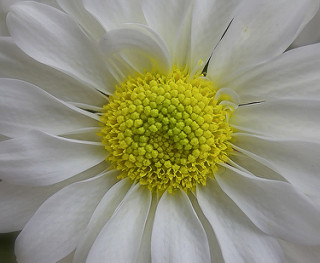

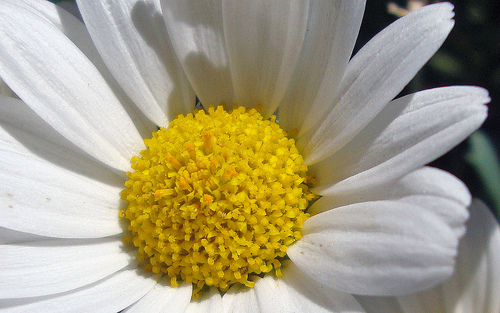

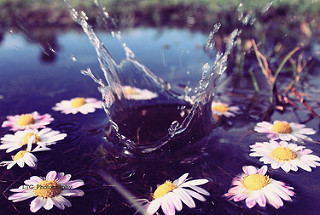

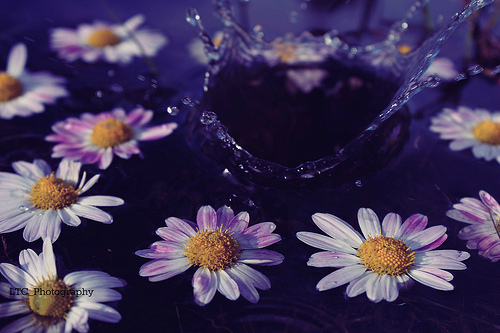

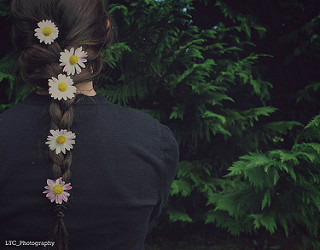

In [ ]:
# display first five images of the flowers
for i in range(5):
  display(ds['train'][i]['image'])

In [ ]:
# different flowers available in dataset
labels = ds['train'].features['label'].names
labels

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
# Split the dataset into train and test dataset
ds_train_validation = ds['train'].train_test_split(test_size=0.1, seed=1, shuffle=True)
ds_train_validation

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3303
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 367
    })
})

In [ ]:
# Lets say this is validation dataset
ds_train_validation['validation'] = ds_train_validation.pop('test')
ds_train_validation

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3303
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 367
    })
})

In [ ]:
ds.update(ds_train_validation)
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3303
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 367
    })
})

In [ ]:
# Split the train dataset again into train and test dataset, this time to get test dataset
ds_train_test = ds['train'].train_test_split(test_size=0.1, seed=1, shuffle=True)
ds_train_test

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2972
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 331
    })
})

In [ ]:
# Finally we have our training, testing and validation dataset
ds.update(ds_train_test)
ds

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2972
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 367
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 331
    })
})

## Using pre-trained model without fine-tuning

In [ ]:

from transformers import AutoModelForImageClassification, AutoFeatureExtractor
import torch
# using vision transformer model of patch size 16*16 and image size 224
model_id = 'google/vit-base-patch16-224'

# Sending model to cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModelForImageClassification.from_pretrained(model_id).to(device)
model.eval()

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [ ]:
# Preparing i/p feature : normalization, resizing images & sprecifying the size
feature_extractor = AutoFeatureExtractor.from_pretrained(model_id)
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}

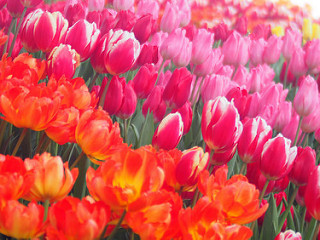

In [ ]:
# Taking a random image to see how it looks like on extracting features
train_image_id = 3
one_image = ds['train'][train_image_id]['image']
one_image

In [ ]:
# We get pytorch tensor as outputs
inp = feature_extractor(images=one_image, return_tensors='pt')
inp

{'pixel_values': tensor([[[[ 0.8039,  0.8353,  0.8118,  ...,  0.9922,  1.0000,  1.0000],
          [ 0.7882,  0.6941,  0.6078,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.7098,  0.5686,  0.6235,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [-0.6941, -0.7176, -0.7490,  ..., -0.2941, -0.1686,  0.2000],
          [-0.6471, -0.7569, -0.8039,  ..., -0.3804, -0.2078,  0.1843],
          [-0.6000, -0.6941, -0.8039,  ..., -0.4510, -0.2549,  0.1686]],

         [[-0.6000, -0.7098, -0.7804,  ...,  0.9922,  1.0000,  1.0000],
          [-0.7255, -0.7412, -0.7961,  ...,  1.0000,  1.0000,  1.0000],
          [-0.7569, -0.7804, -0.8118,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [-0.7255, -0.7490, -0.8118,  ..., -0.5373, -0.7961, -0.9608],
          [-0.6941, -0.7255, -0.7882,  ..., -0.5765, -0.8196, -0.9529],
          [-0.6235, -0.7176, -0.7804,  ..., -0.6000, -0.8431, -0.9686]],

         [[-0.0745, -0.1765, -0.2157,  ...,  0.9922,  1.0000,  1.0000],
          [-0

In [ ]:
inp = feature_extractor(images=one_image, return_tensors='pt').to(device)
outp = model(**inp)
outp

ImageClassifierOutput(loss=None, logits=tensor([[-2.6465e-01,  2.4560e-01, -9.3033e-01, -9.0163e-02, -7.2027e-01,
         -6.9271e-01, -2.9413e-01, -1.9739e-02, -3.9560e-01, -1.5814e+00,
          6.9377e-01, -1.0876e+00, -1.6026e+00, -7.1225e-01, -8.6418e-01,
         -9.7723e-02, -1.2808e-01, -7.6169e-01,  1.7158e-03, -1.7973e+00,
         -7.6865e-01, -3.9841e-01, -1.3043e+00, -8.4577e-01, -2.6171e-01,
         -1.0951e+00, -7.4435e-01, -1.4295e+00, -1.1153e+00, -6.6912e-01,
         -1.1013e+00, -1.2263e+00, -9.7092e-01, -1.1745e+00, -6.0647e-01,
         -9.0994e-01,  1.6867e-02, -1.5615e-01, -8.8855e-01, -6.4097e-01,
         -1.4468e-01, -5.5449e-01, -7.7151e-01, -4.0527e-01,  1.2411e-02,
         -8.4242e-01, -1.1913e+00, -5.2829e-01, -1.3650e+00, -8.8367e-01,
         -1.1699e+00, -2.0226e-01, -7.4786e-01, -1.3463e+00, -1.2216e+00,
         -1.3798e+00, -1.0736e+00, -7.9586e-01, -1.2307e+00, -9.0284e-01,
          2.6091e-01, -1.3658e-01, -9.5352e-01, -7.7037e-01, -7.8705e-01

In [ ]:
outp.logits.shape

torch.Size([1, 1000])

In [ ]:
# higest output class
torch.argmax(outp.logits, dim=1)

tensor([738])

In [ ]:
# using argmax  to find the largest value assosiated with a class of flower
pred = torch.argmax(outp.logits, dim=1).item()
pred

738

In [ ]:
# to check labels associated with exact mapping ID
model.config

ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "tench, Tinca tinca",
    "1": "goldfish, Carassius auratus",
    "2": "great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias",
    "3": "tiger shark, Galeocerdo cuvieri",
    "4": "hammerhead, hammerhead shark",
    "5": "electric ray, crampfish, numbfish, torpedo",
    "6": "stingray",
    "7": "cock",
    "8": "hen",
    "9": "ostrich, Struthio camelus",
    "10": "brambling, Fringilla montifringilla",
    "11": "goldfinch, Carduelis carduelis",
    "12": "house finch, linnet, Carpodacus mexicanus",
    "13": "junco, snowbird",
    "14": "indigo bunting, indigo finch, indigo bird, Passerina cyanea",
    "15": "robin, American robin, Turdus migratorius",
    "16": "bulbul",
 

In [ ]:
# out of the 1000 labels on Image net 738 is the closest match i.e., pot or flowerpot
model.config.id2label[pred]

'pot, flowerpot'

#### Check if all 5 type of flowers have ID exist in imagenet dataset

In [ ]:
'daisy' in model.config.label2id

True

In [ ]:
'tulip' in model.config.label2id

False

In [ ]:
'sunflower' in model.config.label2id

False

In [ ]:
'roses' in model.config.label2id

False

In [ ]:
'dandelion' in model.config.label2id

False

## Defining a model


only daisies are one of the 1000 classes in ImageNet. So we will need to define our own model. Starting weights are still the weights of the pre-trained VisionTransformer model (have output as 1000 classes). We want only 5 o/p classes

In [ ]:
model_id = 'google/vit-base-patch16-224'

In [ ]:
labels = ds['train'].features['label'].names
labels

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [ ]:
id2label = {key: value for key, value in enumerate(labels)}
id2label

{0: 'daisy', 1: 'dandelion', 2: 'roses', 3: 'sunflowers', 4: 'tulips'}

In [ ]:
label2id = {value:key for key, value in enumerate(labels)}
label2id

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [ ]:
model = AutoModelForImageClassification.from_pretrained(model_id,
                                                        num_labels=len(labels),
                                                        id2label=id2label,
                                                        label2id=label2id,
                                                        ignore_mismatched_sizes=True # now train only on 5 classes
                                                        )

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([5, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([5]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Pre-processing Images

In [ ]:
import torchvision

from torchvision.transforms import (
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    ToTensor,
    Resize,
    CenterCrop
)


In [ ]:
normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)

In [ ]:
feature_extractor.size

224

In [ ]:
train_transform = Compose(
    [
     RandomResizedCrop(feature_extractor.size),
     RandomHorizontalFlip(),
     ToTensor(),
     normalize
    ]
)

validation_transform = Compose(
        [
            Resize(feature_extractor.size),
            CenterCrop(feature_extractor.size),
            ToTensor(),
            normalize,
        ]
    )

def train_transform_images(images):
  images["pixel_values"] = [train_transform(image.convert("RGB")) for image in images["image"]]
  return images

def validation_transform_images(images):
  images["pixel_values"] = [validation_transform(image.convert("RGB")) for image in images["image"]]
  return images

# Why pixel_values as keys: as part of forward method, image will pass through pixel_values (check hugging face doc)


In [ ]:
# Apply transformations to the train, validation and test set
transformed_ds = ds.with_transform(train_transform_images)
transformed_ds['train'] = ds['train'].with_transform(train_transform_images)
transformed_ds['validation'] = ds['validation'].with_transform(validation_transform_images)
transformed_ds['test'] = ds['test'].with_transform(validation_transform_images)


## A transformed Image

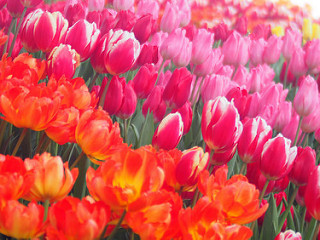

In [ ]:
sample_image = ds['train'][train_image_id]['image']
sample_image

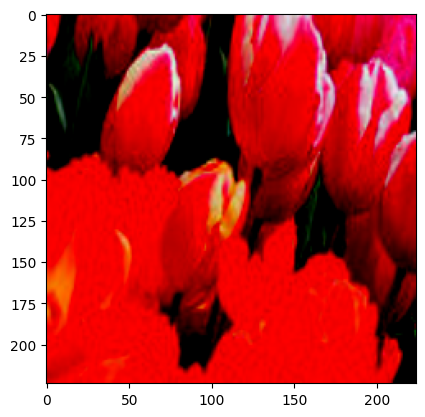

In [ ]:
# Re-run cell multiple times to see how images are transformer differently (train_transform)
import matplotlib.pyplot as plt
transformed_sample_image = train_transform(sample_image)
plt.imshow(transformed_sample_image.permute(1, 2, 0))
# .permute(1, 2, 0) why? pytorch tensors has its certain format (#of channels, rows, columns).
# plotting library matplotlib, expects images with format (rows, columns, channels)

In [ ]:
transformed_sample_image
# image looks darker bcz, values have been clipped. So values <0 are mapped to 0 and >1 are mapped to 1
# Here all values are less than 0 and in -ve, so mapped to 0 and gives images a darker and brighter look

tensor([[[ 0.8824,  0.9216,  0.9608,  ...,  0.9529,  0.9765,  1.0000],
         [ 0.9137,  0.9373,  0.9608,  ...,  0.9137,  0.9529,  0.9922],
         [ 0.9686,  0.9686,  0.9608,  ...,  0.8275,  0.9059,  0.9765],
         ...,
         [ 0.7804,  0.7804,  0.7882,  ..., -0.4275, -0.3176, -0.2392],
         [ 0.8510,  0.8431,  0.8431,  ..., -0.4118, -0.3176, -0.2471],
         [ 0.8824,  0.8745,  0.8667,  ..., -0.4039, -0.3176, -0.2549]],

        [[-0.7176, -0.6549, -0.5765,  ..., -0.0902, -0.0824, -0.0824],
         [-0.7255, -0.6706, -0.5922,  ..., -0.0745, -0.0824, -0.0824],
         [-0.7490, -0.7020, -0.6314,  ..., -0.0510, -0.0745, -0.0902],
         ...,
         [-0.6549, -0.6471, -0.6314,  ..., -0.3647, -0.2314, -0.1137],
         [-0.6157, -0.6078, -0.5922,  ..., -0.3647, -0.2235, -0.1059],
         [-0.5922, -0.5843, -0.5686,  ..., -0.3647, -0.2235, -0.1059]],

        [[-0.1451, -0.0902, -0.0196,  ...,  0.3804,  0.4039,  0.4275],
         [-0.1451, -0.0980, -0.0275,  ...,  0

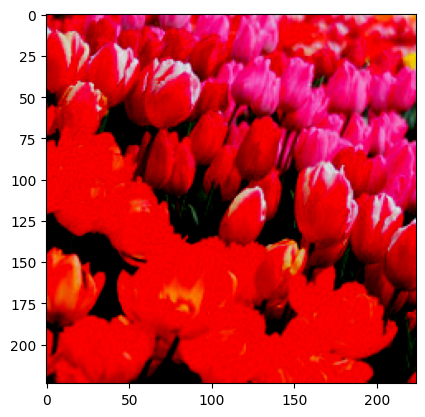

In [ ]:
# Re-run cell multiple times (doing same for validation_transform)
import matplotlib.pyplot as plt
transformed_sample_image = validation_transform(sample_image)
plt.imshow(transformed_sample_image.permute(1, 2, 0))


## Getting images in the correct format

In [ ]:
four_images = [transformed_ds['train'][i] for i in range(4)]
four_images


[{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=159x240>,
  'label': 1,
  'pixel_values': tensor([[[-0.0902, -0.0824, -0.0353,  ..., -0.4588, -0.4588, -0.4588],
           [-0.1059, -0.0980, -0.0510,  ..., -0.4588, -0.4588, -0.4588],
           [-0.1451, -0.1373, -0.0902,  ..., -0.4510, -0.4510, -0.4510],
           ...,
           [-0.6863, -0.6863, -0.6706,  ..., -0.0902, -0.1373, -0.1451],
           [-0.6784, -0.6784, -0.6706,  ..., -0.0902, -0.1216, -0.1216],
           [-0.6784, -0.6784, -0.6706,  ..., -0.0902, -0.1137, -0.1137]],
  
          [[ 0.0353,  0.0431,  0.0902,  ..., -0.1686, -0.1686, -0.1686],
           [ 0.0588,  0.0588,  0.0980,  ..., -0.1686, -0.1686, -0.1686],
           [ 0.1137,  0.1137,  0.1294,  ..., -0.1608, -0.1608, -0.1608],
           ...,
           [-0.6471, -0.6471, -0.6314,  ...,  0.1059,  0.1059,  0.0980],
           [-0.6392, -0.6392, -0.6314,  ...,  0.1216,  0.1373,  0.1294],
           [-0.6392, -0.6392, -0.6314,  ...,  0.1216,  

In [ ]:
print(four_images[0]['pixel_values'].shape, four_images[1]['pixel_values'].shape, four_images[2]['pixel_values'].shape, four_images[3]['pixel_values'].shape)
# Format of each image obtained by this (no of channels, no of pixel/height, width)

torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) torch.Size([3, 224, 224]) torch.Size([3, 224, 224])


In [ ]:
# lets looks at the labels associated with the images
four_images_labels = [image['label'] for image in four_images]
four_images_labels

[1, 4, 1, 4]

This should have been of type tensor
So now converting to type tensor

In [ ]:
import torch
four_images_labels = torch.tensor([image['label'] for image in four_images])
four_images_labels

tensor([1, 4, 1, 4])

To convert all pixel values, "torch.tensor" won't work: one element tensor can't be converted to python scalar.

use "torch.cat" method

In [ ]:
four_images_pixel_values = torch.cat([image['pixel_values'] for image in four_images])
four_images_pixel_values


tensor([[[-0.0902, -0.0824, -0.0353,  ..., -0.4588, -0.4588, -0.4588],
         [-0.1059, -0.0980, -0.0510,  ..., -0.4588, -0.4588, -0.4588],
         [-0.1451, -0.1373, -0.0902,  ..., -0.4510, -0.4510, -0.4510],
         ...,
         [-0.6863, -0.6863, -0.6706,  ..., -0.0902, -0.1373, -0.1451],
         [-0.6784, -0.6784, -0.6706,  ..., -0.0902, -0.1216, -0.1216],
         [-0.6784, -0.6784, -0.6706,  ..., -0.0902, -0.1137, -0.1137]],

        [[ 0.0353,  0.0431,  0.0902,  ..., -0.1686, -0.1686, -0.1686],
         [ 0.0588,  0.0588,  0.0980,  ..., -0.1686, -0.1686, -0.1686],
         [ 0.1137,  0.1137,  0.1294,  ..., -0.1608, -0.1608, -0.1608],
         ...,
         [-0.6471, -0.6471, -0.6314,  ...,  0.1059,  0.1059,  0.0980],
         [-0.6392, -0.6392, -0.6314,  ...,  0.1216,  0.1373,  0.1294],
         [-0.6392, -0.6392, -0.6314,  ...,  0.1216,  0.1451,  0.1451]],

        [[ 0.2314,  0.2235,  0.1765,  ...,  0.0431,  0.0431,  0.0431],
         [ 0.2392,  0.2314,  0.1765,  ...,  0

In [ ]:
four_images_pixel_values.shape

torch.Size([12, 224, 224])

This isn't the correct format, from HF documentation, it should look like as (batch, no of channels, height, width)

use "torch.stack" method to convert it in that form

In [ ]:
four_images_pixel_values = torch.stack([image['pixel_values'] for image in four_images])
four_images_pixel_values.shape

torch.Size([4, 3, 224, 224])

In [ ]:
# Put everything into a batch using collate function
from torch.utils.data import DataLoader

def collate_fn(images):
  labels = torch.tensor([image['label'] for image in images])
  pixel_values = torch.stack([image['pixel_values'] for image in images])
  return {'pixel_values': pixel_values, 'labels': labels}

train_dataloader = DataLoader(transformed_ds['train'], batch_size=4, collate_fn=collate_fn, shuffle=True)
validation_dataloader = DataLoader(transformed_ds['validation'], batch_size=4, collate_fn=collate_fn, shuffle=False)
test_dataloader = DataLoader(transformed_ds['test'], batch_size=4, collate_fn=collate_fn, shuffle=False)


In [ ]:
batch = next(iter(train_dataloader))

for key, value in batch.items():
  print(key, value.shape)


pixel_values torch.Size([4, 3, 224, 224])
labels torch.Size([4])


## Training arguments

In [ ]:
from transformers import TrainingArguments, Trainer

batch_size=32
metric_name = "accuracy"
model_name = 'vit-base-patch16-224-finetuned-flower'

args = TrainingArguments(
    model_name,
    evaluation_strategy="steps",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    remove_unused_columns=False,
    logging_dir='./logs',
    push_to_hub=False
)

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
!git config --global credential.helper store

## Model Training

In [ ]:
args = TrainingArguments(
    model_name,
    evaluation_strategy="steps",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=1,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    remove_unused_columns=False,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=transformed_ds['train'],
    eval_dataset=transformed_ds['validation'],
    tokenizer=feature_extractor,
    data_collator=collate_fn,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 2972
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 93
  Number of trainable parameters = 85802501


Step,Training Loss,Validation Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=93, training_loss=0.3327510587630733, metrics={'train_runtime': 6308.7738, 'train_samples_per_second': 0.471, 'train_steps_per_second': 0.015, 'total_flos': 2.303123856192553e+17, 'train_loss': 0.3327510587630733, 'epoch': 1.0})

It is giving training and validation loss, but we want to measure accuracy as evaluation model.

In [ ]:
trainer.predict(transformed_ds['test'])

***** Running Prediction *****
  Num examples = 331
  Batch size = 32


PredictionOutput(predictions=array([[-1.5118781 , -1.1157521 , -0.6438744 , -1.7465954 ,  4.468878  ],
       [-0.4088489 ,  5.2297277 , -1.6492393 , -0.09296699, -1.9323181 ],
       [-0.9701152 , -1.2912747 , -0.50105107, -1.9590446 ,  4.005788  ],
       ...,
       [-1.0930405 , -0.24931717,  1.2648468 , -0.48988515,  0.01828715],
       [-1.4402248 , -1.6291041 ,  3.497219  , -1.4514513 , -0.975396  ],
       [-1.3515081 ,  5.7497654 , -1.0389886 , -1.6270761 , -2.2090406 ]],
      dtype=float32), label_ids=array([4, 1, 4, 1, 0, 1, 4, 1, 3, 3, 3, 3, 4, 0, 2, 0, 3, 1, 4, 2, 0, 4,
       3, 3, 3, 2, 4, 1, 0, 3, 1, 0, 1, 1, 4, 1, 2, 0, 4, 3, 0, 3, 4, 4,
       0, 3, 1, 4, 1, 3, 1, 0, 2, 4, 1, 0, 4, 3, 3, 3, 0, 1, 4, 0, 1, 4,
       2, 4, 2, 0, 3, 0, 4, 1, 3, 3, 4, 3, 4, 3, 3, 1, 0, 2, 4, 3, 4, 1,
       4, 0, 1, 4, 0, 0, 1, 1, 0, 1, 0, 4, 2, 4, 4, 4, 0, 3, 2, 1, 4, 4,
       4, 4, 4, 1, 3, 0, 2, 2, 4, 0, 0, 4, 0, 2, 4, 3, 4, 1, 3, 0, 1, 1,
       4, 3, 0, 1, 0, 2, 3, 2, 2, 2, 2, 4, 4

In [ ]:
import evaluate
import numpy as np

metric = evaluate.load('accuracy')

def compute_metrics(batch):
  return metric.compute(
      references=batch.label_ids,
      predictions=np.argmax(batch.predictions, axis=1))



In [ ]:
args = TrainingArguments(
    model_name,
    evaluation_strategy="steps",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    remove_unused_columns=False,
    logging_dir='./logs',
    push_to_hub=True
)

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=transformed_ds['train'],
    eval_dataset=transformed_ds['validation'],
    tokenizer=feature_extractor,
    data_collator=collate_fn,
    compute_metrics=compute_metrics) # just define (accuracy as evaluation model)

using `logging_steps` to initialize `eval_steps` to 500
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
/content/vit-base-patch16-224-finetuned-flower is already a clone of https://huggingface.co/yashika0998/vit-base-patch16-224-finetuned-flower. Make sure you pull the latest changes with `repo.git_pull()`.


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/

<IPython.core.display.Javascript object>

In [ ]:

trainer.train()
trainer.save_model()

In [ ]:
trainer.evaluate(transformed_ds['train'])

In [ ]:
trainer.evaluate(transformed_ds['validation'])

In [ ]:
trainer.evaluate(transformed_ds['test'])

## Infrence in notebook

In [ ]:
test_image = ds['test'][-1]['image']
test_image

In [ ]:
# It will download the model first and then we will get the prediction
import torch
from transformers import AutoModelForImageClassification, AutoFeatureExtractor

model_id = f'yashika0998/vit-base-patch16-224-finetuned-flower'

def classify_image(image):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = AutoModelForImageClassification.from_pretrained(model_id).to(device)
  feature_extractor = AutoFeatureExtractor.from_pretrained(model_id)
  inp = feature_extractor(image, return_tensors='pt').to(device)
  outp = model(**inp)
  pred = torch.argmax(outp.logits, dim=-1).item()
  return model.config.id2label[pred]

classify_image(test_image)

In [ ]:
import torch

model_id = f'yashika0998/vit-base-patch16-224-finetuned-flower'

def classify_image(image):
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = AutoModelForImageClassification.from_pretrained(model_id).to(device)
  feature_extractor = AutoFeatureExtractor.from_pretrained(model_id)
  inp = feature_extractor(image, return_tensors='pt').to(device)
  outp = model(**inp)
  pred = torch.nn.functional.softmax(outp.logits, dim=-1) #softmax: to get range of probability that it is which type of flower
  preds = pred[0].cpu().detach().numpy()
  confidence = {label: float(preds[i]) for i, label in enumerate(labels)}
  return confidence

classify_image(test_image)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--yashika0998--vit-base-patch16-224-finetuned-flower/snapshots/3f55adc5998b663b8c953c23cf4bbdfe3cfb6c49/config.json
Model config ViTConfig {
  "_name_or_path": "yashika0998/vit-base-patch16-224-finetuned-flower",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id2label": {
    "0": "daisy",
    "1": "dandelion",
    "2": "roses",
    "3": "sunflowers",
    "4": "tulips"
  },
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "daisy": 0,
    "dandelion": 1,
    "roses": 2,
    "sunflowers": 3,
    "tulips": 4
  },
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "problem_type": "single_label_classification

{'daisy': 9.033076639752835e-05,
 'dandelion': 0.9996360540390015,
 'roses': 8.014433842618018e-05,
 'sunflowers': 0.00010452822607476264,
 'tulips': 8.89026778168045e-05}

In [ ]:
from transformers import pipeline

model_id = f'yashika0998/vit-base-patch16-224-finetuned-flower'
feature_extractor = AutoFeatureExtractor.from_pretrained(model_id)

image_classifier = pipeline('image-classification', model=model_id, feature_extractor=feature_extractor, framework="pt")
image_classifier(test_image)

loading configuration file preprocessor_config.json from cache at /root/.cache/huggingface/hub/models--yashika0998--vit-base-patch16-224-finetuned-flower/snapshots/3f55adc5998b663b8c953c23cf4bbdfe3cfb6c49/preprocessor_config.json
Feature extractor ViTFeatureExtractor {
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "ViTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "size": 224
}

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--yashika0998--vit-base-patch16-224-finetuned-flower/snapshots/3f55adc5998b663b8c953c23cf4bbdfe3cfb6c49/config.json
Model config ViTConfig {
  "_name_or_path": "yashika0998/vit-base-patch16-224-finetuned-flower",
  "architectures": [
    "ViTForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "id

[{'score': 0.9996360540390015, 'label': 'dandelion'},
 {'score': 0.00010452822607476264, 'label': 'sunflowers'},
 {'score': 9.033076639752835e-05, 'label': 'daisy'},
 {'score': 8.89026778168045e-05, 'label': 'tulips'},
 {'score': 8.014433842618018e-05, 'label': 'roses'}]

## Infrence on phone using Gradio

In [ ]:
!wget https://github.com/jonfernandes/Advanced_AI_Transformers_for_Computer_Vision/raw/main/flower-1.jpeg
!wget https://github.com/jonfernandes/Advanced_AI_Transformers_for_Computer_Vision/raw/main/flower-2.jpeg

--2023-09-22 05:14:10--  https://github.com/jonfernandes/Advanced_AI_Transformers_for_Computer_Vision/raw/main/flower-1.jpeg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jonfernandes/Advanced_AI_Transformers_for_Computer_Vision/main/flower-1.jpeg [following]
--2023-09-22 05:14:10--  https://raw.githubusercontent.com/jonfernandes/Advanced_AI_Transformers_for_Computer_Vision/main/flower-1.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180993 (177K) [image/jpeg]
Saving to: ‘flower-1.jpeg.2’

flower-1.jpeg.2     100%[===================>] 176.75K  --.-KB/s    in 0.04s   

2023-09-22 05:14:1

In [ ]:
!ls -l

total 225088
-rw-r--r-- 1 root   root    180993 Sep 22 05:00 flower-1.jpeg
-rw-r--r-- 1 root   root    180993 Sep 22 05:02 flower-1.jpeg.1
-rw-r--r-- 1 root   root    180993 Sep 22 05:14 flower-1.jpeg.2
-rw-r--r-- 1 root   root    182353 Sep 22 05:00 flower-2.jpeg
-rw-r--r-- 1 root   root    182353 Sep 22 05:02 flower-2.jpeg.1
-rw-r--r-- 1 root   root    182353 Sep 22 05:07 flower-2.jpeg.2
-rw-r--r-- 1 root   root    182353 Sep 22 05:07 flower-2.jpeg.3
-rw-r--r-- 1 root   root    182353 Sep 22 05:11 flower-2.jpeg.4
-rw-r--r-- 1 root   root    182353 Sep 22 05:14 flower-2.jpeg.5
drwxr-x--- 7 270850 5000      4096 Feb 10  2016 flower_photos
-rw-r--r-- 1 root   root 228813984 Sep 21 22:31 flower_photos.tgz
drwxr-xr-x 3 root   root      4096 Sep 22 04:17 logs
drwxr-xr-x 1 root   root      4096 Sep 20 13:25 sample_data
drwxr-xr-x 3 root   root      4096 Sep 22 03:43 vit-base-patch16-224-finetuned-flower


In [ ]:
import torch
from transformers import AutoModelForImageClassification, AutoFeatureExtractor
import gradio as gr

model_id = f'yashika0998/vit-base-patch16-224-finetuned-flower'
labels = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

def classify_image(image):
  model = AutoModelForImageClassification.from_pretrained(model_id)
  feature_extractor = AutoFeatureExtractor.from_pretrained(model_id)
  inp = feature_extractor(image, return_tensors='pt')
  outp = model(**inp)
  pred = torch.nn.functional.softmax(outp.logits, dim=-1)
  preds = pred[0].cpu().detach().numpy()
  confidence = {label: float(preds[i]) for i, label in enumerate(labels)}
  return labels

interface = gr.Interface(fn=classify_image,
                         inputs='image',
                         examples=['flower-1.jpeg', 'flower-2.jpeg'],
                         outputs='label').launch(debug=True, share=True)

AttributeError: ignored